### Белянинов Илья ПМ22-1

# Семинар

1. Загрузите первые 400 строк прилагающегося датасета diabetes.csv.
2. Сделайте количественное описание датасета: число признаков, статистику по признакам.
3. Отделите целевую переменную Outcome.
4. Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.
5. Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.
6. Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.
7. Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.
8. Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.
9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.
10. Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import fetch_openml

warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=500, 
                           n_informative=50, n_repeated=0, 
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8415
Test score: 0.8056


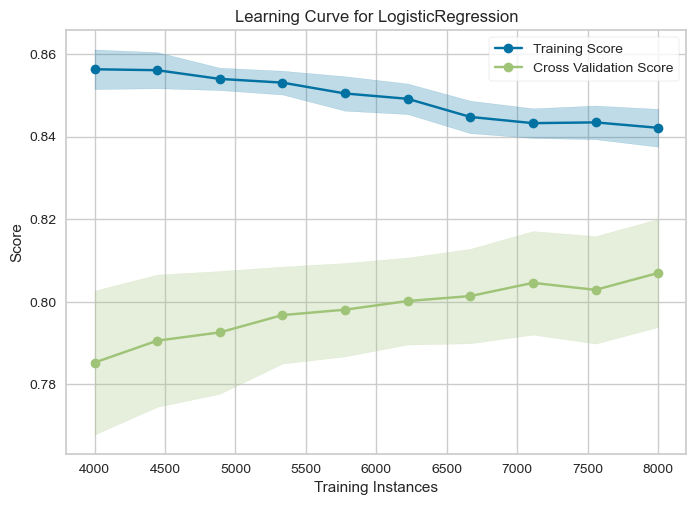

In [4]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

In [5]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


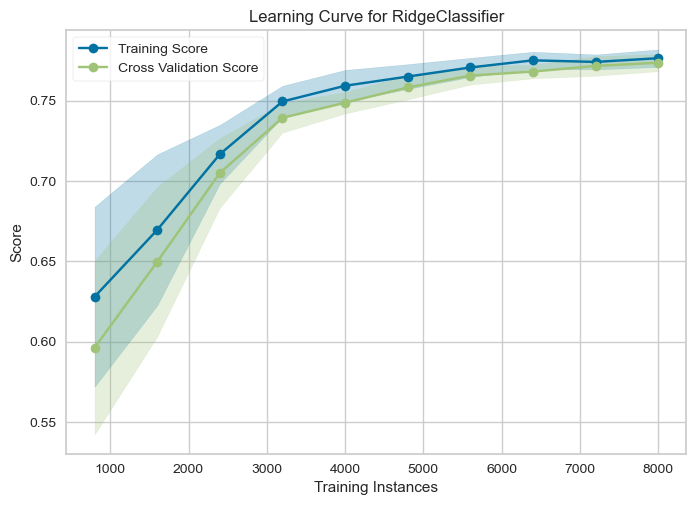

In [6]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

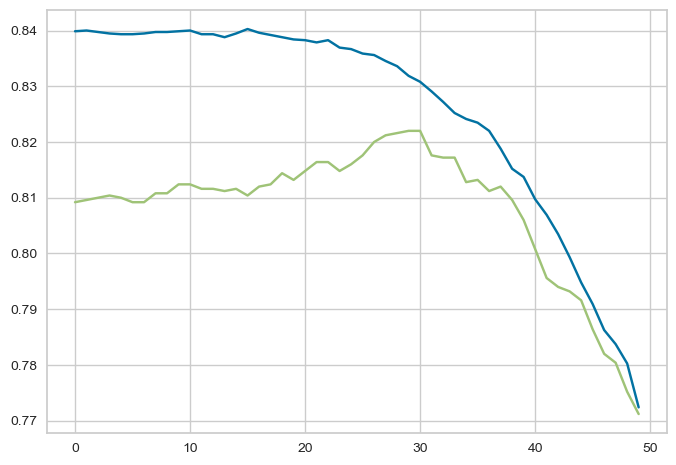

In [7]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [8]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


In [14]:
visualizer = LearningCurve(
    lr, train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

In [15]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [16]:
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import Ridge
visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show() 

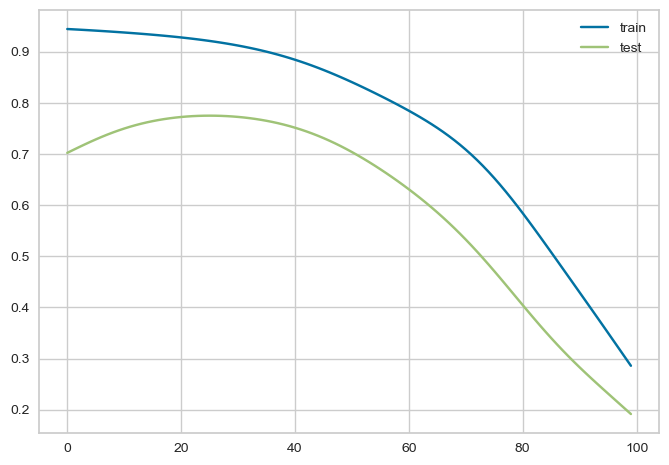

In [17]:
trains = []
tests = []
for i in np.logspace(-2, 3, 100):
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [18]:
lr = Ridge(alpha=0.18).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.92
Linear Regression-Test set score: 0.77


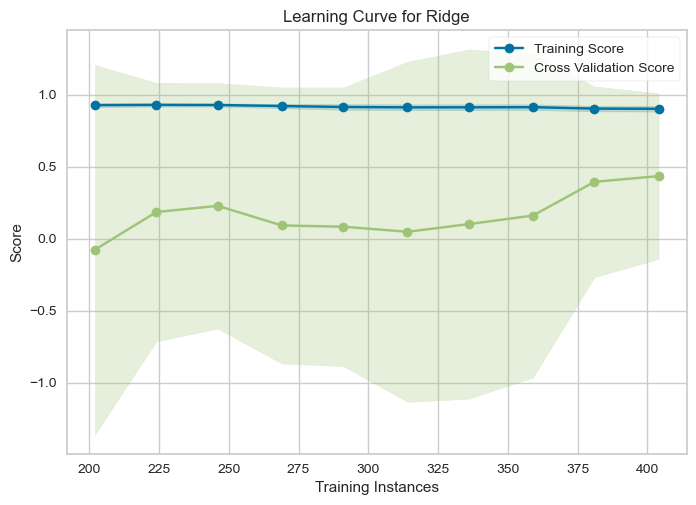

In [22]:
visualizer = LearningCurve(
    lr, scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

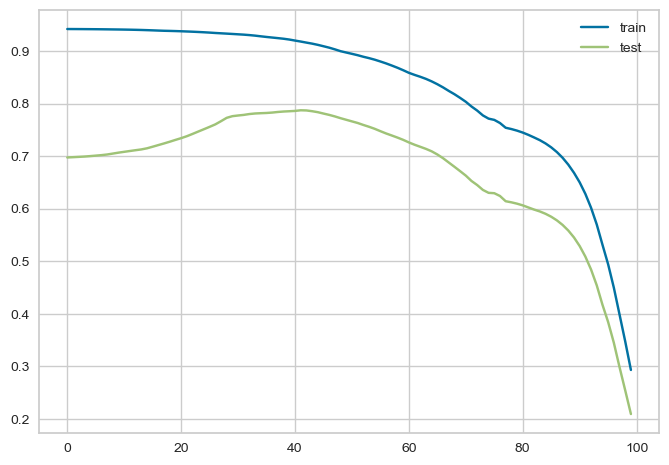

In [23]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
    ridge = Lasso(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [24]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [25]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


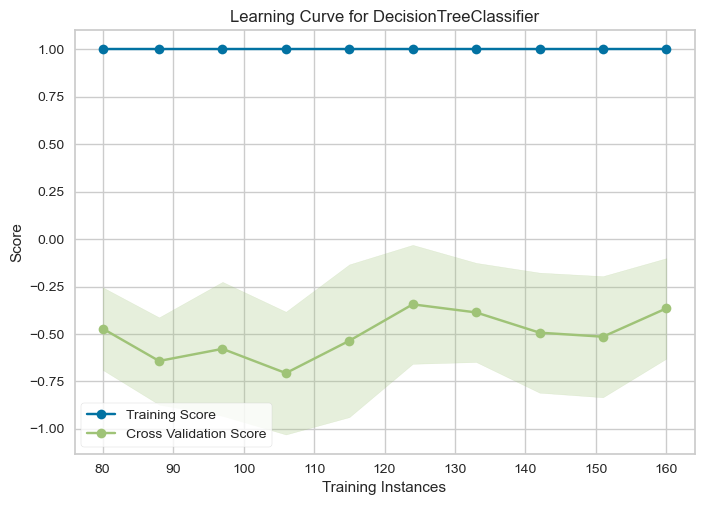

In [27]:
visualizer = LearningCurve(
    model, scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

In [32]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

In [33]:
model = DecisionTreeClassifier(random_state=1, max_depth=4).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.8500
Test score = 0.6250


In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


In [35]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='delta_ailerons', parser="auto")
data.data.shape

(7129, 5)

In [36]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6058
Test score = 0.5940


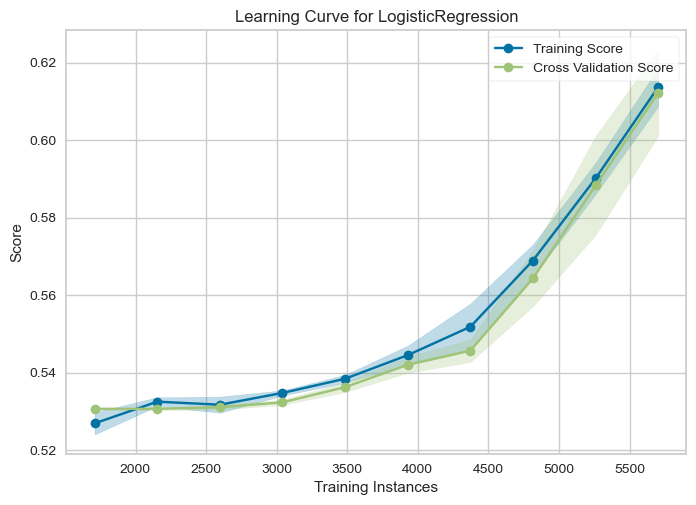

In [40]:
visualizer = LearningCurve(
    model, scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show() 

In [41]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9379
Test score = 0.9369


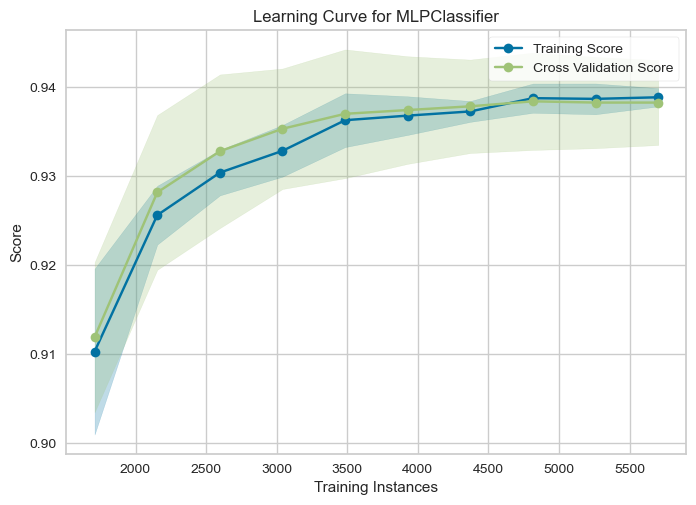

In [42]:
visualizer = LearningCurve(
    model, scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show() 

In [43]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


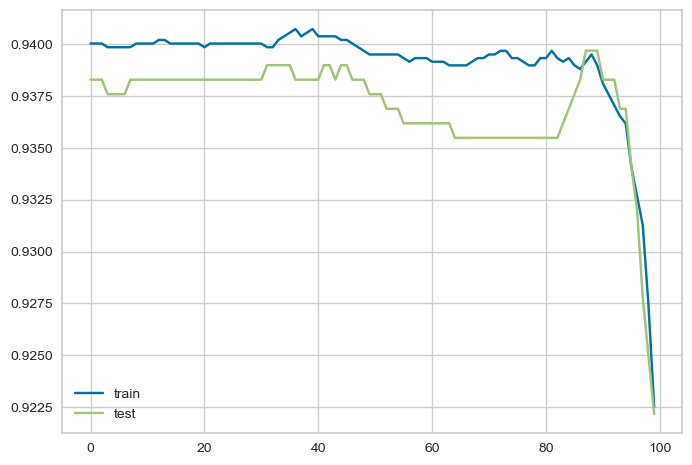

In [44]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
    ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
    trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
    tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

# Задания для самостоятельного выполнения

#### 1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X, y = make_classification(n_samples=10000, n_features=500, 
                           n_informative=50, n_repeated=0, 
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training preceison: {precision_score(lr.predict(X_train), y_train):.4f}")
print(f"Test precison: {precision_score(lr.predict(X_test), y_test):.4f}")
print('-------------------')
print(f"Training preceison: {recall_score(lr.predict(X_train), y_train):.4f}")
print(f"Test precison: {recall_score(lr.predict(X_test), y_test):.4f}")
print('-------------------')
print(f"Training preceison: {f1_score(lr.predict(X_train), y_train):.4f}")
print(f"Test precison: {f1_score(lr.predict(X_test), y_test):.4f}")

Training preceison: 0.8515
Test precison: 0.8056
-------------------
Training preceison: 0.8339
Test precison: 0.8069
-------------------
Training preceison: 0.8426
Test precison: 0.8062


precision


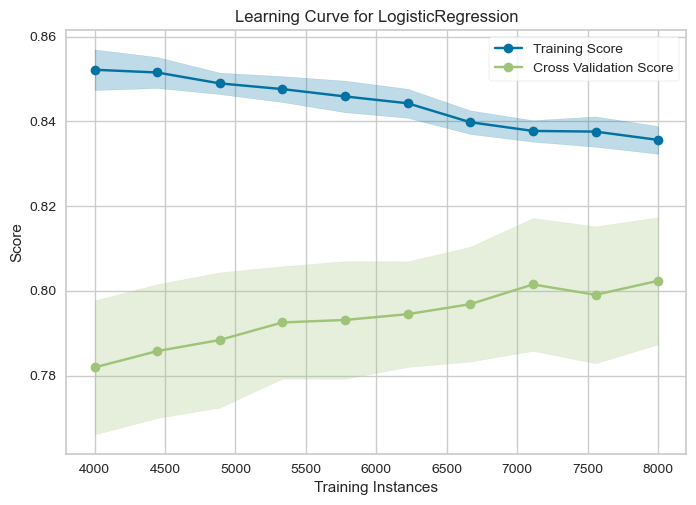

recall


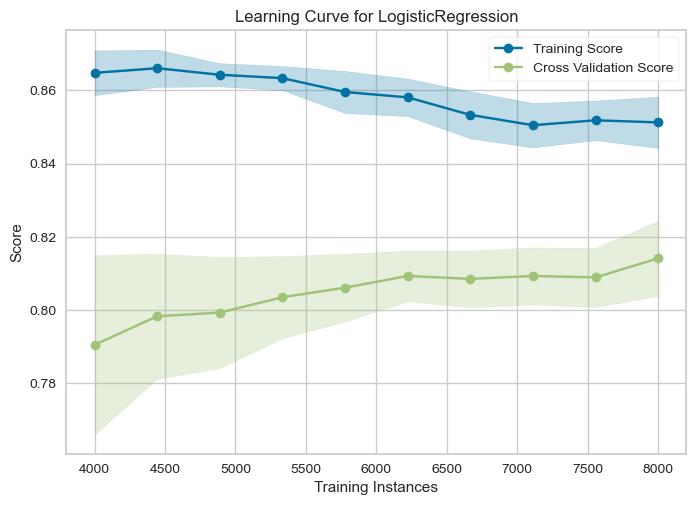

f1


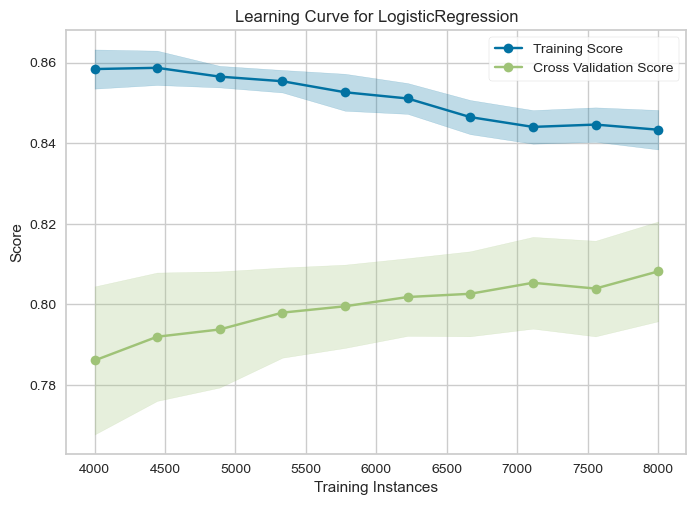

In [112]:
from yellowbrick.model_selection import LearningCurve

print('precision')
visualizer = LearningCurve(
    LogisticRegression(), scoring='precision', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

print('recall')
visualizer = LearningCurve(
    LogisticRegression(), scoring='recall', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

print('f1')
visualizer = LearningCurve(
    LogisticRegression(), scoring='f1', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

In [47]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training preceison: {precision_score(lr.predict(X_train), y_train):.4f}")
print(f"Test precison: {precision_score(lr.predict(X_test), y_test):.4f}")
print('-------------------')
print(f"Training preceison: {recall_score(lr.predict(X_train), y_train):.4f}")
print(f"Test precison: {recall_score(lr.predict(X_test), y_test):.4f}")
print('-------------------')
print(f"Training preceison: {f1_score(lr.predict(X_train), y_train):.4f}")
print(f"Test precison: {f1_score(lr.predict(X_test), y_test):.4f}")

Training preceison: 0.7780
Test precison: 0.7801
-------------------
Training preceison: 0.7683
Test precison: 0.7678
-------------------
Training preceison: 0.7731
Test precison: 0.7739


precision


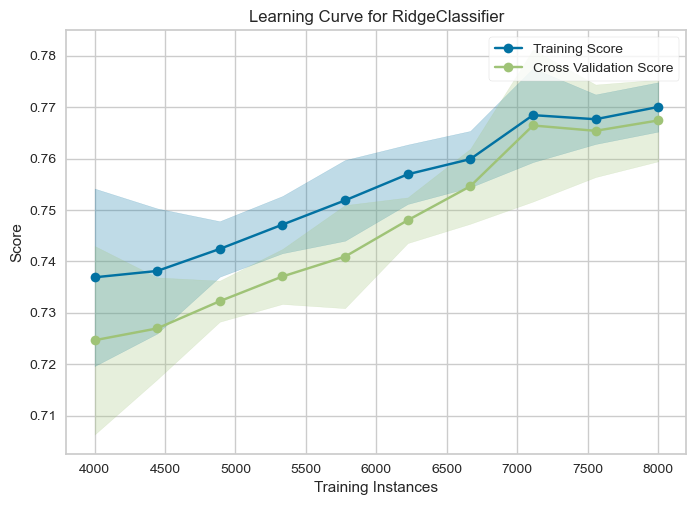

recall


f1


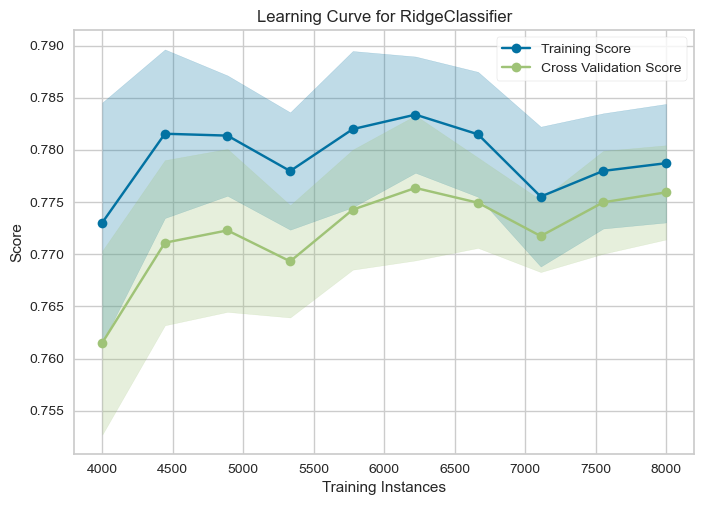

In [48]:
print('precision')
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), scoring='precision', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

print('recall')
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), scoring='recall', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

print('f1')
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), scoring='f1', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

precision


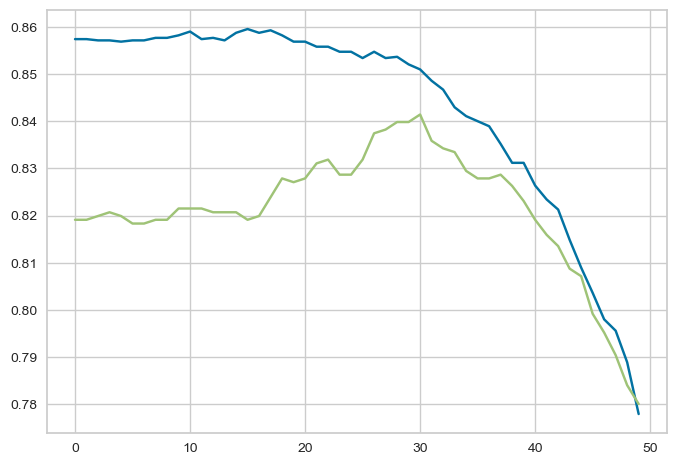

In [49]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
print('precision')
for i in np.logspace(2, 6, 50):
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
    trains.append(precision_score(ridge.predict(X_train), y_train))
    tests.append(precision_score(ridge.predict(X_test), y_test))

plt.plot(trains)
plt.plot(tests)

In [9]:
trains = []
tests = []
print('recall')
for i in np.logspace(2, 6, 50):
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
    trains.append(recall_score(ridge.predict(X_train), y_train))
    tests.append(recall_score(ridge.predict(X_test), y_test))

plt.plot(trains)
plt.plot(tests)

recall


f1


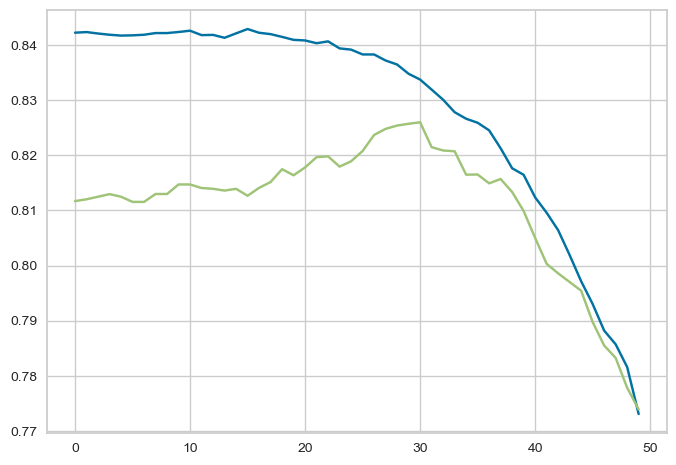

In [10]:
trains = []
tests = []
print('f1')
for i in np.logspace(2, 6, 50):
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
    trains.append(f1_score(ridge.predict(X_train), y_train))
    tests.append(f1_score(ridge.predict(X_test), y_test))

plt.plot(trains)
plt.plot(tests)

In [114]:
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training preceison: {precision_score(lr.predict(X_train), y_train):.4f}")
print(f"Test precison: {precision_score(lr.predict(X_test), y_test):.4f}")
print('-------------------')
print(f"Training preceison: {recall_score(lr.predict(X_train), y_train):.4f}")
print(f"Test precison: {recall_score(lr.predict(X_test), y_test):.4f}")
print('-------------------')
print(f"Training preceison: {f1_score(lr.predict(X_train), y_train):.4f}")
print(f"Test precison: {f1_score(lr.predict(X_test), y_test):.4f}")

Training preceison: 0.8513
Test precison: 0.8414
-------------------
Training preceison: 0.8174
Test precison: 0.8123
-------------------
Training preceison: 0.8340
Test precison: 0.8266


precision


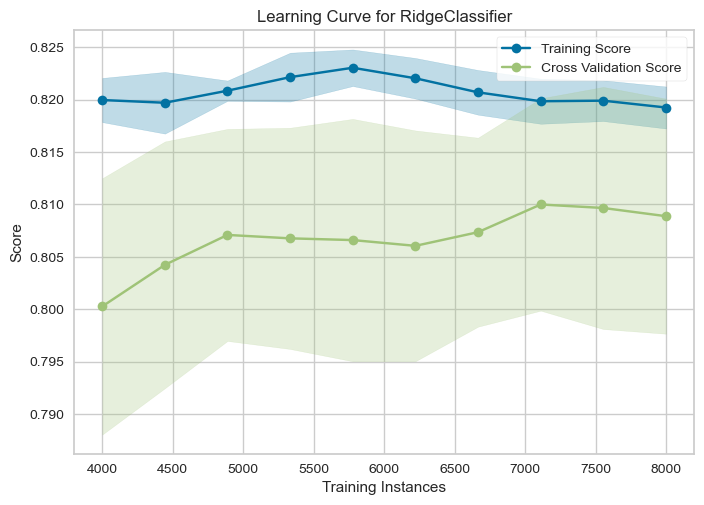

recall


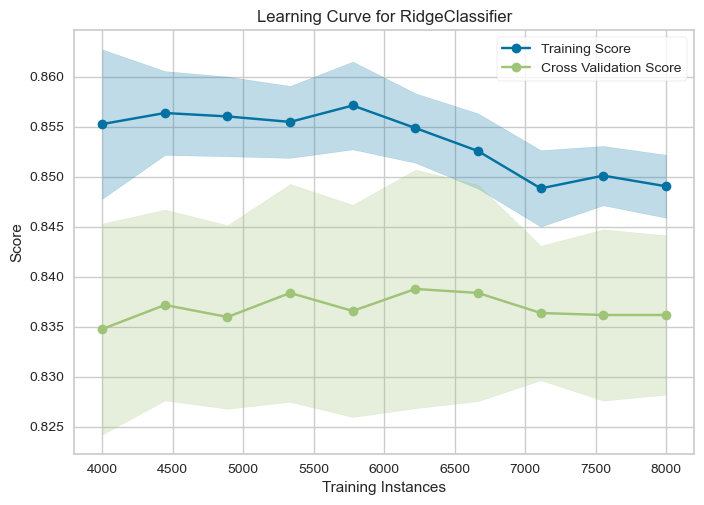

f1


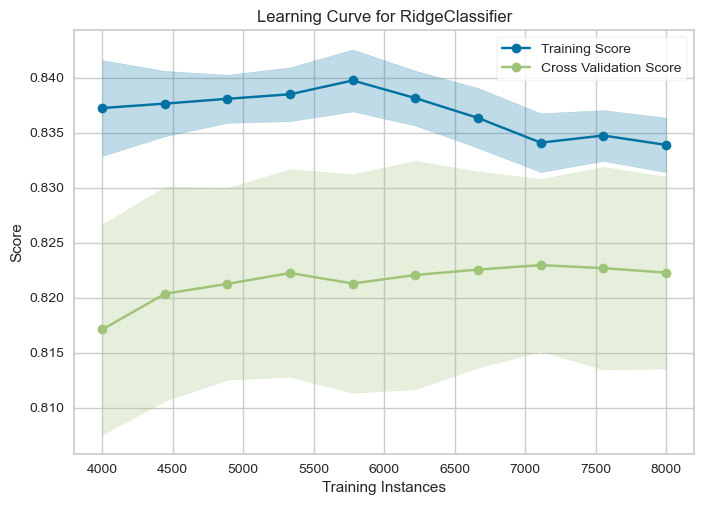

In [116]:
print('precision')
visualizer = LearningCurve(
    RidgeClassifier(alpha=26500), scoring='precision', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

print('recall')
visualizer = LearningCurve(
    RidgeClassifier(alpha=26500), scoring='recall', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

print('f1')
visualizer = LearningCurve(
    RidgeClassifier(alpha=26500), scoring='f1', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

#### 2. Повторите диагностику модели регрессии с использованием других видов моделей:
i. метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)\
ii. метода ближайших соседей (исследуйте влияние количества соседей)\
iii. метода решающих деревьев (гиперпараметры по вашему выбору)

i. метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)

In [51]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [53]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

svr_model_1 = SVR(kernel='linear', C=1.0).fit(X_train, y_train)
svr_model_2 = SVR(kernel='linear', C=3.0).fit(X_train, y_train)
svr_model_3 = SVR(kernel='linear', C=5.0).fit(X_train, y_train)
svr_model_4 = SVR(kernel='linear', C=10.0).fit(X_train, y_train)

print('C = 1')
print(f"Training score: {svr_model_1.score(X_train, y_train):.4f}")
print(f"Test score: {svr_model_1.score(X_test, y_test):.4f}")
print('C = 3')
print(f"Training score: {svr_model_2.score(X_train, y_train):.4f}")
print(f"Test score: {svr_model_2.score(X_test, y_test):.4f}")
print('C = 5')
print(f"Training score: {svr_model_3.score(X_train, y_train):.4f}")
print(f"Test score: {svr_model_3.score(X_test, y_test):.4f}")
print('C = 10')
print(f"Training score: {svr_model_4.score(X_train, y_train):.4f}")
print(f"Test score: {svr_model_4.score(X_test, y_test):.4f}")

C = 1
Training score: 0.7967
Test score: 0.6224
C = 3
Training score: 0.8498
Test score: 0.6853
C = 5
Training score: 0.8675
Test score: 0.7060
C = 10
Training score: 0.8866
Test score: 0.7275


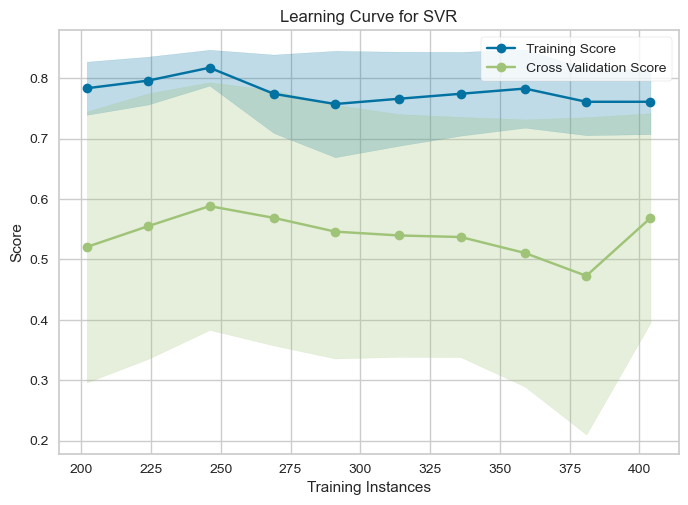

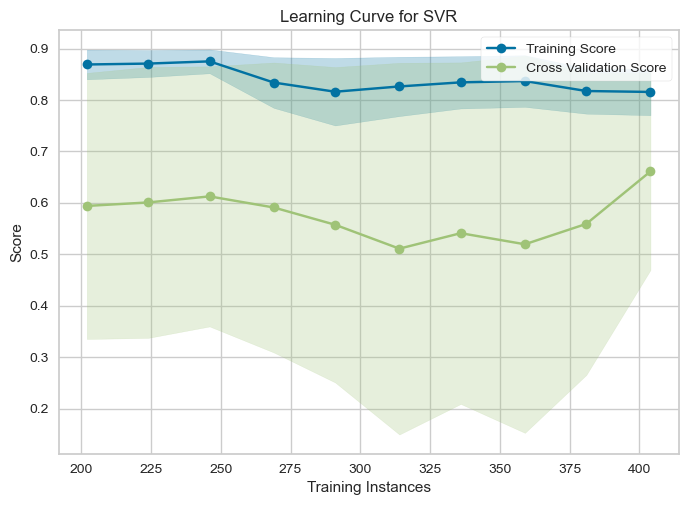

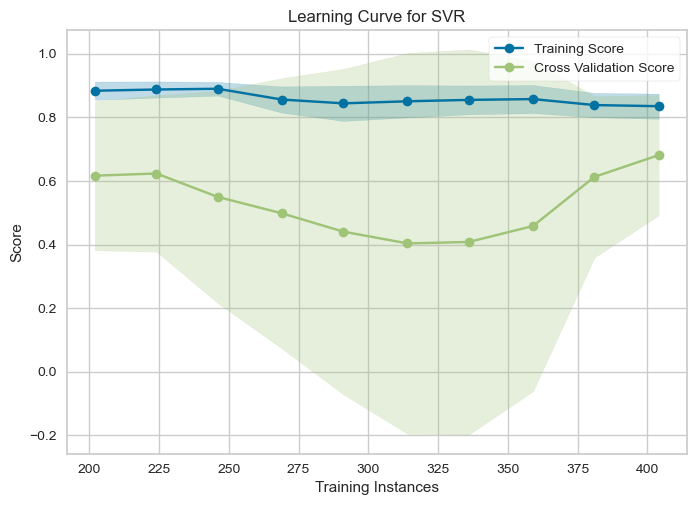

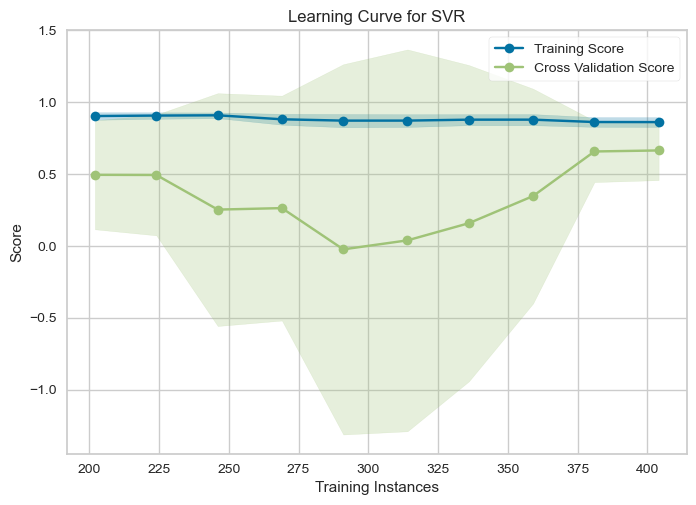

In [7]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    SVR(kernel='linear', C=1.0), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

visualizer = LearningCurve(
    SVR(kernel='linear', C=3.0), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

visualizer = LearningCurve(
    SVR(kernel='linear', C=5.0), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

visualizer = LearningCurve(
    SVR(kernel='linear', C=10.0), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

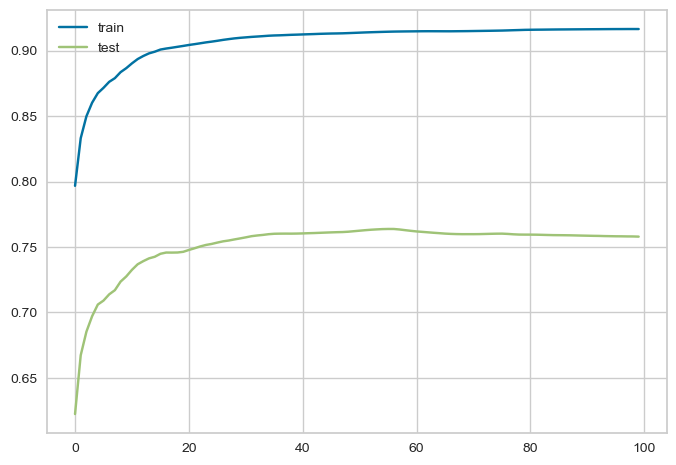

In [9]:
trains = []
tests = []
for i in np.linspace(1, 100, 100):
    svr_model_1 = SVR(kernel='linear', C=i).fit(X_train, y_train)
    trains.append(svr_model_1.score(X_train, y_train))
    tests.append(svr_model_1.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [24]:
svr_model = SVR(kernel='linear', C=55.0).fit(X_train, y_train)

print(f"Training score: {svr_model.score(X_train, y_train):.4f}")
print(f"Test score: {svr_model.score(X_test, y_test):.4f}")

Training score: 0.9143
Test score: 0.7637


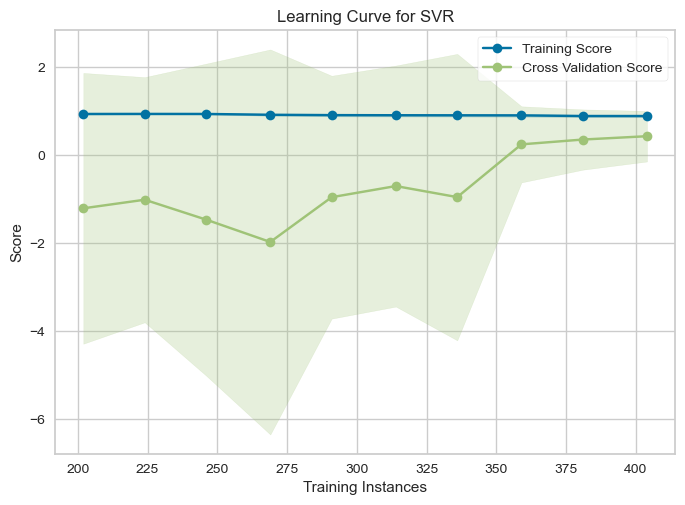

In [8]:
visualizer = LearningCurve(
    SVR(kernel='linear', C=55.0), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

ii. метода ближайших соседей (исследуйте влияние количества соседей)

In [54]:
knn_model_1 = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
knn_model_2 = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
knn_model_3 = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)
knn_model_4 = KNeighborsRegressor(n_neighbors=9).fit(X_train, y_train)

print('n_neighbors = 3')
print(f"Training score: {knn_model_1.score(X_train, y_train):.4f}")
print(f"Test score: {knn_model_1.score(X_test, y_test):.4f}")
print('n_neighbors = 5')
print(f"Training score: {knn_model_2.score(X_train, y_train):.4f}")
print(f"Test score: {knn_model_2.score(X_test, y_test):.4f}")
print('n_neighbors = 7')
print(f"Training score: {knn_model_3.score(X_train, y_train):.4f}")
print(f"Test score: {knn_model_3.score(X_test, y_test):.4f}")
print('n_neighbors = 9')
print(f"Training score: {knn_model_4.score(X_train, y_train):.4f}")
print(f"Test score: {knn_model_4.score(X_test, y_test):.4f}")

n_neighbors = 3
Training score: 0.8954
Test score: 0.6111
n_neighbors = 5
Training score: 0.8328
Test score: 0.5586
n_neighbors = 7
Training score: 0.7993
Test score: 0.5414
n_neighbors = 9
Training score: 0.7642
Test score: 0.5512


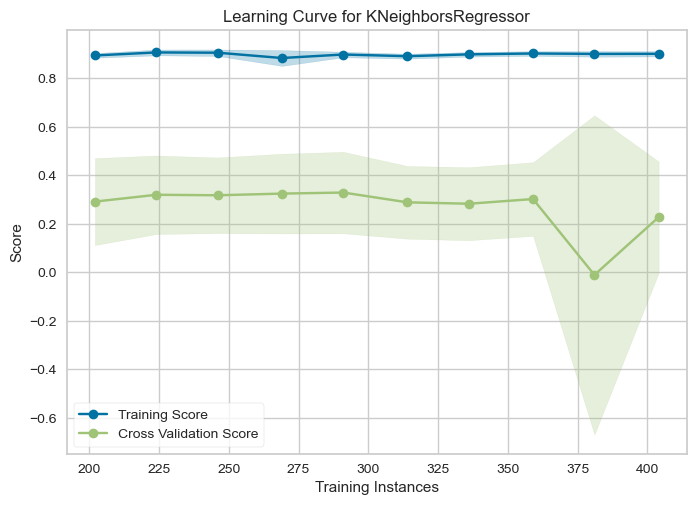

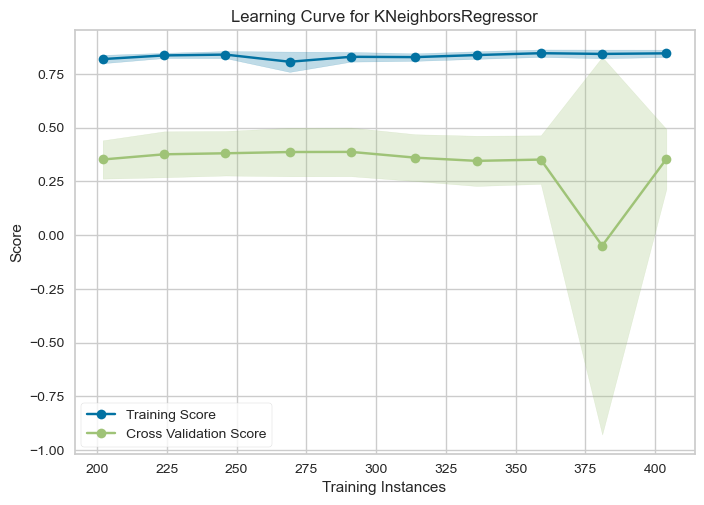

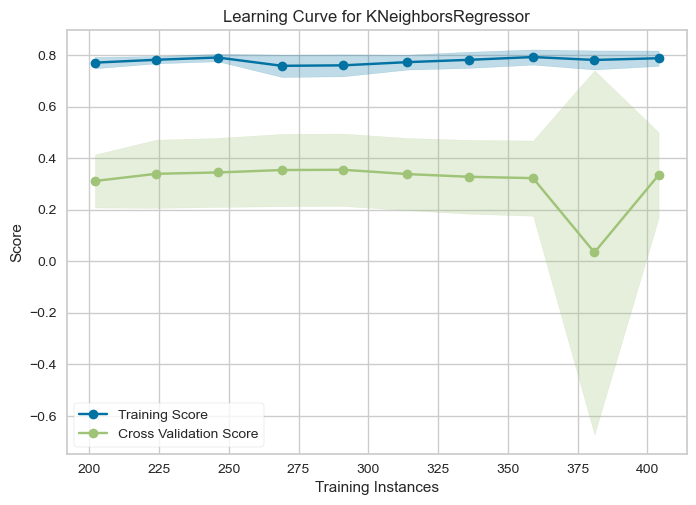

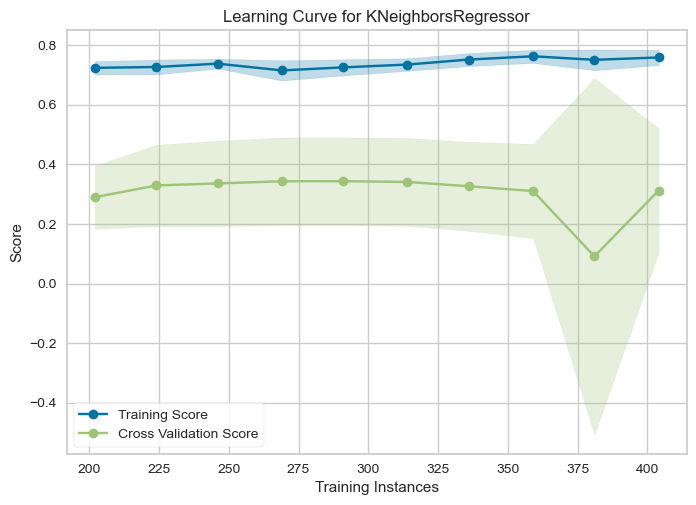

In [56]:
visualizer = LearningCurve(
    KNeighborsRegressor(n_neighbors=3), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

visualizer = LearningCurve(
    KNeighborsRegressor(n_neighbors=5), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

visualizer = LearningCurve(
    KNeighborsRegressor(n_neighbors=7), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

visualizer = LearningCurve(
    KNeighborsRegressor(n_neighbors=9), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

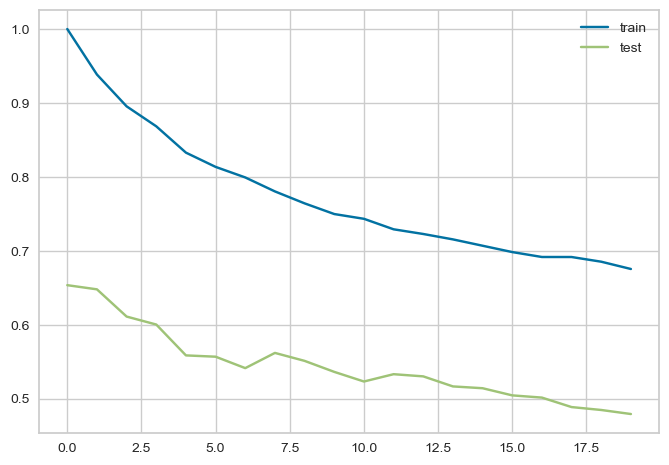

In [23]:
trains = []
tests = []
for i in np.linspace(1, 20, 20):
    knn_model_1 = KNeighborsRegressor(n_neighbors=int(i)).fit(X_train, y_train)
    trains.append(knn_model_1.score(X_train, y_train))
    tests.append(knn_model_1.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [25]:
knn_model = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)

print(f"Training score: {knn_model.score(X_train, y_train):.4f}")
print(f"Test score: {knn_model.score(X_test, y_test):.4f}")

Training score: 0.7993
Test score: 0.5414


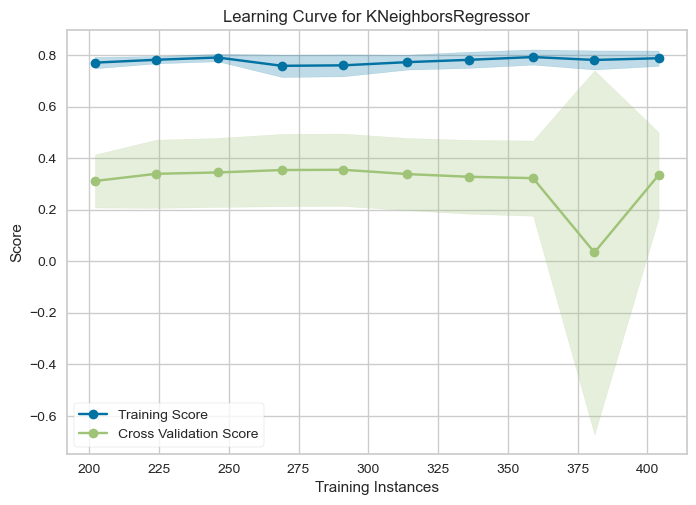

In [28]:
visualizer = LearningCurve(
    KNeighborsRegressor(n_neighbors=7), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

iii. метода решающих деревьев (гиперпараметры по вашему выбору)

In [30]:
dt_model_1 = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
dt_model_2 = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
dt_model_3 = DecisionTreeRegressor(max_depth=7).fit(X_train, y_train)
dt_model_4 = DecisionTreeRegressor(max_depth=9).fit(X_train, y_train)

print('max_depth = 3')
print(f"Training score: {dt_model_1.score(X_train, y_train):.4f}")
print(f"Test score: {knn_model_1.score(X_test, y_test):.4f}")
print('max_depth = 5')
print(f"Training score: {dt_model_2.score(X_train, y_train):.4f}")
print(f"Test score: {knn_model_2.score(X_test, y_test):.4f}")
print('max_depth = 7')
print(f"Training score: {dt_model_3.score(X_train, y_train):.4f}")
print(f"Test score: {knn_model_3.score(X_test, y_test):.4f}")
print('max_depth = 9')
print(f"Training score: {dt_model_4.score(X_train, y_train):.4f}")
print(f"Test score: {knn_model_4.score(X_test, y_test):.4f}")

max_depth = 3
Training score: 0.8639
Test score: 0.4793
max_depth = 5
Training score: 0.9507
Test score: 0.5586
max_depth = 7
Training score: 0.9818
Test score: 0.5414
max_depth = 9
Training score: 0.9945
Test score: 0.5512


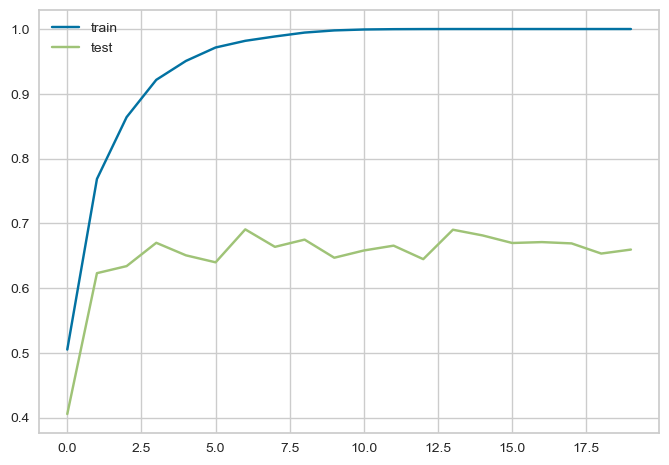

In [33]:
trains = []
tests = []
for i in np.linspace(1, 20, 20):
    dt_model = DecisionTreeRegressor(max_depth=int(i)).fit(X_train, y_train)
    trains.append(dt_model.score(X_train, y_train))
    tests.append(dt_model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [35]:
dt_model = DecisionTreeRegressor(max_depth=6).fit(X_train, y_train)

print('max_depth = 6')
print(f"Training score: {dt_model.score(X_train, y_train):.4f}")
print(f"Test score: {dt_model.score(X_test, y_test):.4f}")

max_depth = 6
Training score: 0.9715
Test score: 0.6652


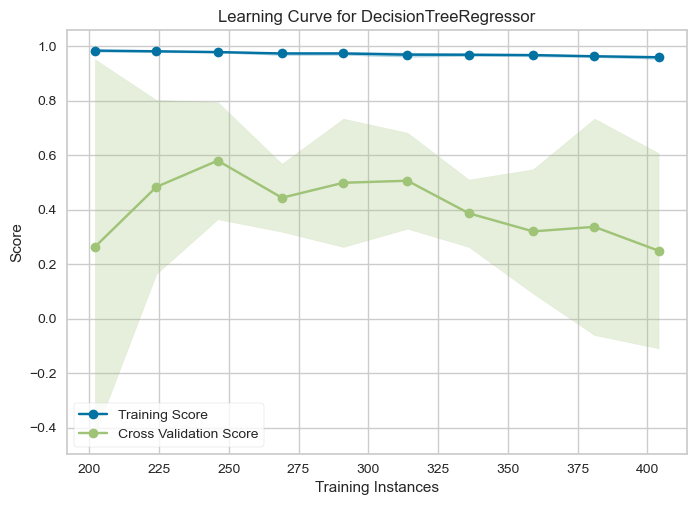

In [10]:
visualizer = LearningCurve(
    DecisionTreeRegressor(max_depth=6), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

#### 3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

In [12]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

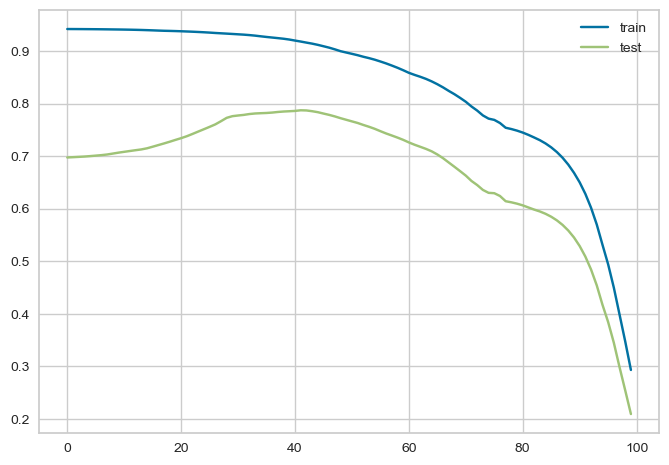

In [13]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
    ridge = Lasso(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [14]:
ridge_underfitting = Lasso(alpha=1).fit(X_train, y_train)
ridge_overfitting = Lasso(alpha=0).fit(X_train, y_train)
ridge_good = Lasso(alpha=0.042).fit(X_train, y_train)

print(f"Training score: {ridge_underfitting.score(X_train, y_train):.4f}")
print(f"Test score: {ridge_underfitting.score(X_test, y_test):.4f}")

print(f"Training score: {ridge_overfitting.score(X_train, y_train):.4f}")
print(f"Test score: {ridge_overfitting.score(X_test, y_test):.4f}")

print(f"Training score: {ridge_good.score(X_train, y_train):.4f}")
print(f"Test score: {ridge_good.score(X_test, y_test):.4f}")

Training score: 0.2932
Test score: 0.2094
Training score: 0.9426
Test score: 0.6916
Training score: 0.8375
Test score: 0.7038


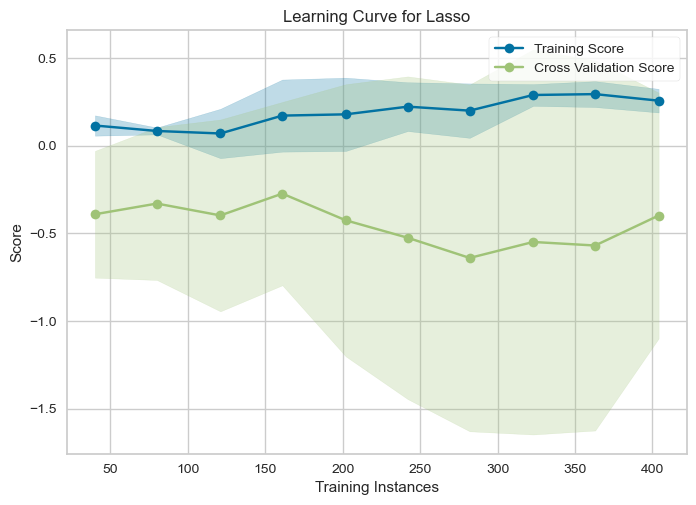

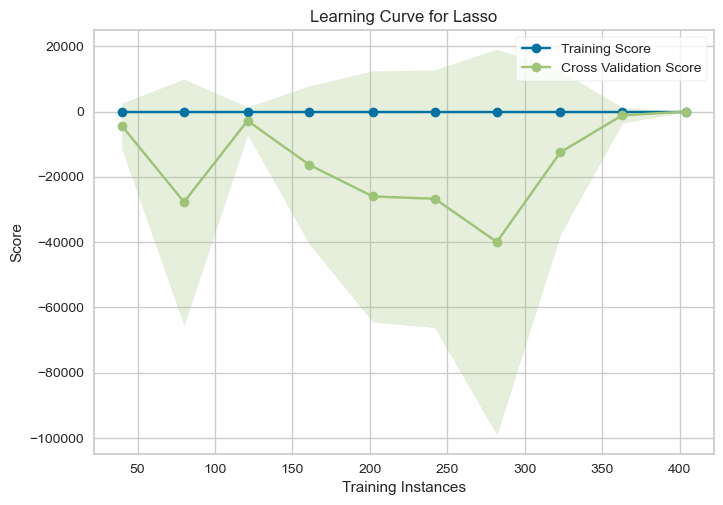

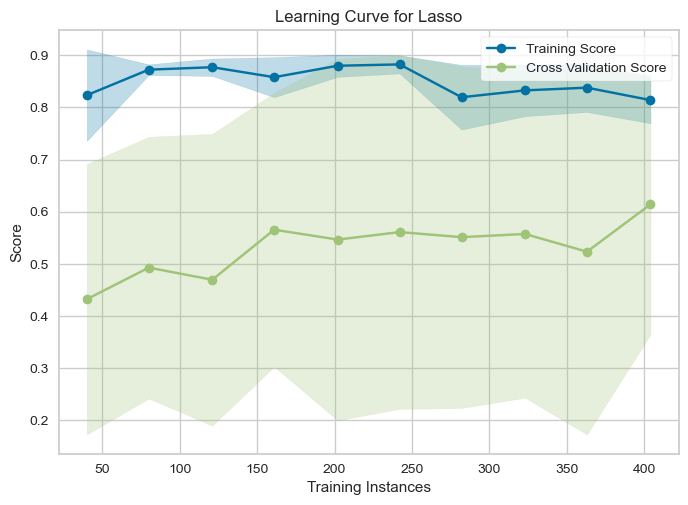

In [15]:
visualizer = LearningCurve(
    Lasso(alpha=1), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

visualizer = LearningCurve(
    Lasso(alpha=0), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

visualizer = LearningCurve(
    Lasso(alpha=0.042), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

#### 4. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.

In [18]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [19]:
from sklearn.linear_model import ElasticNet

alphas = [0.1, 0.5, 1.0, 2.0]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

for alpha in alphas:
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train, y_train)

        print(f"Alpha: {alpha}, L1 Ratio: {l1_ratio}")
        print(f"Training score: {model.score(X_train, y_train):.4f}")
        print(f"Test score: {model.score(X_test, y_test):.4f}")
        print("-----------------------------------------")

Alpha: 0.1, L1 Ratio: 0.1
Training score: 0.7030
Test score: 0.5262
-----------------------------------------
Alpha: 0.1, L1 Ratio: 0.3
Training score: 0.7100
Test score: 0.5357
-----------------------------------------
Alpha: 0.1, L1 Ratio: 0.5
Training score: 0.7192
Test score: 0.5476
-----------------------------------------
Alpha: 0.1, L1 Ratio: 0.7
Training score: 0.7320
Test score: 0.5644
-----------------------------------------
Alpha: 0.1, L1 Ratio: 0.9
Training score: 0.7497
Test score: 0.5933
-----------------------------------------
Alpha: 0.5, L1 Ratio: 0.1
Training score: 0.5060
Test score: 0.3396
-----------------------------------------
Alpha: 0.5, L1 Ratio: 0.3
Training score: 0.4980
Test score: 0.3370
-----------------------------------------
Alpha: 0.5, L1 Ratio: 0.5
Training score: 0.4950
Test score: 0.3395
-----------------------------------------
Alpha: 0.5, L1 Ratio: 0.7
Training score: 0.5030
Test score: 0.3551
-----------------------------------------
Alpha: 0.5

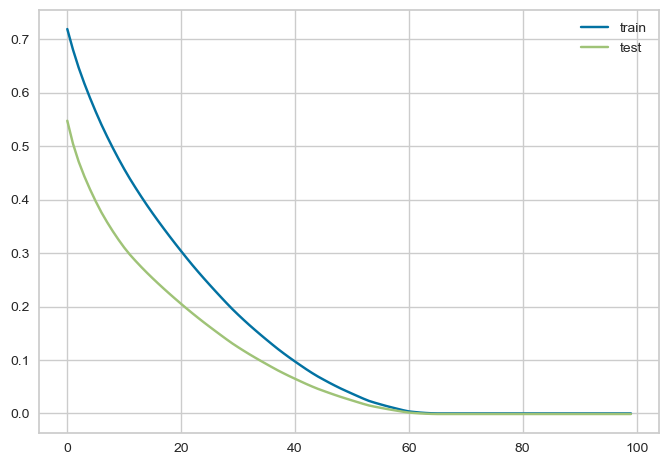

In [20]:
trains = []
tests = []
for i in np.linspace(0.1, 5, 100):
    model = ElasticNet(alpha=i).fit(X_train, y_train)
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

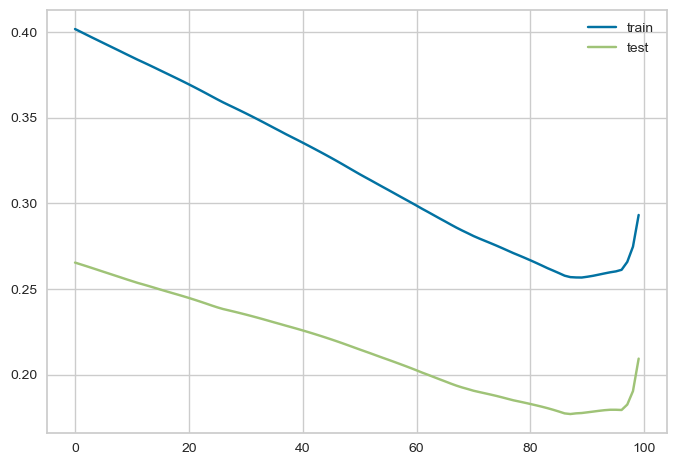

In [21]:
trains = []
tests = []
for i in np.linspace(0.1, 1, 100):
    model = ElasticNet(l1_ratio=i).fit(X_train, y_train)
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [22]:
model = ElasticNet(alpha=0.1, l1_ratio=1, random_state=42)
model.fit(X_train, y_train)

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.7710
Test score: 0.6302


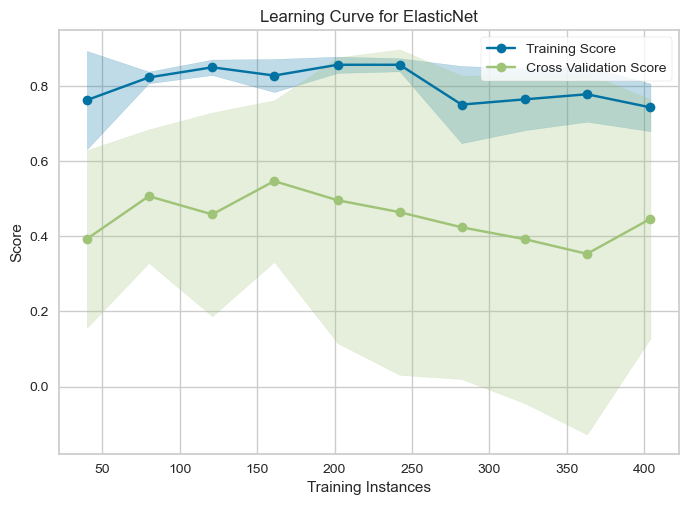

In [23]:
visualizer = LearningCurve(
    ElasticNet(alpha=0.1, l1_ratio=1, random_state=42), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

#### 5. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.

In [2]:
from sklearn.metrics import accuracy_score, f1_score

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [41]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


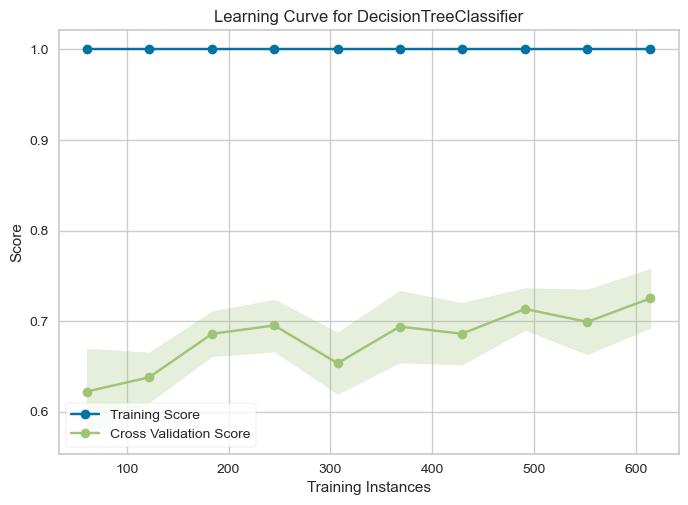

In [43]:
visualizer = LearningCurve(
    DecisionTreeClassifier(random_state=1), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

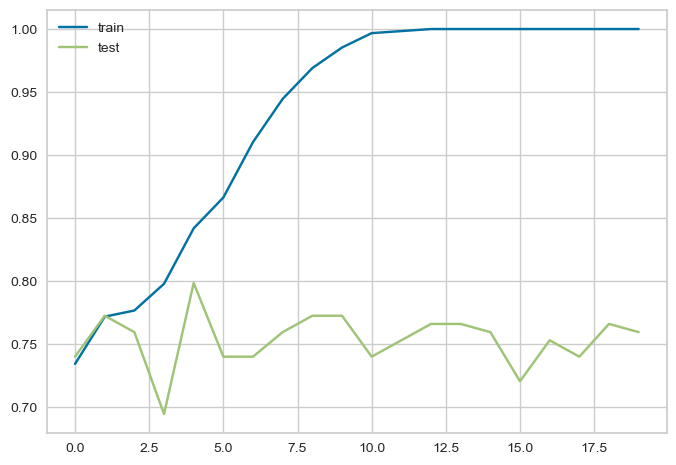

In [44]:
trains = []
tests = []
for i in np.linspace(1, 20, 20):
    model = DecisionTreeClassifier(max_depth=int(i)).fit(X_train, y_train)
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

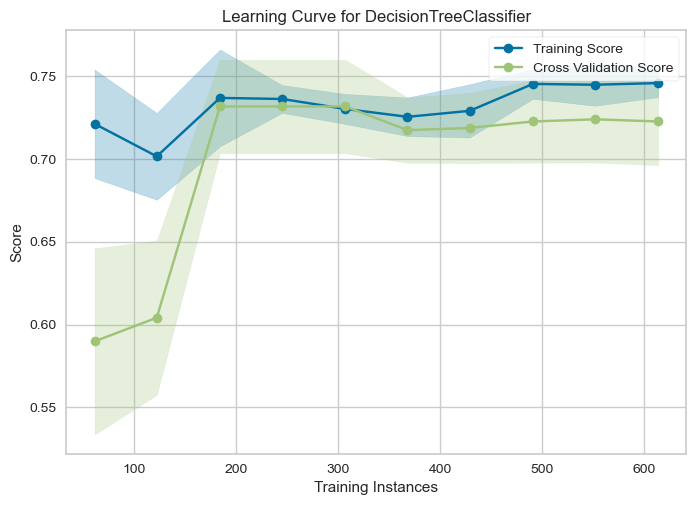

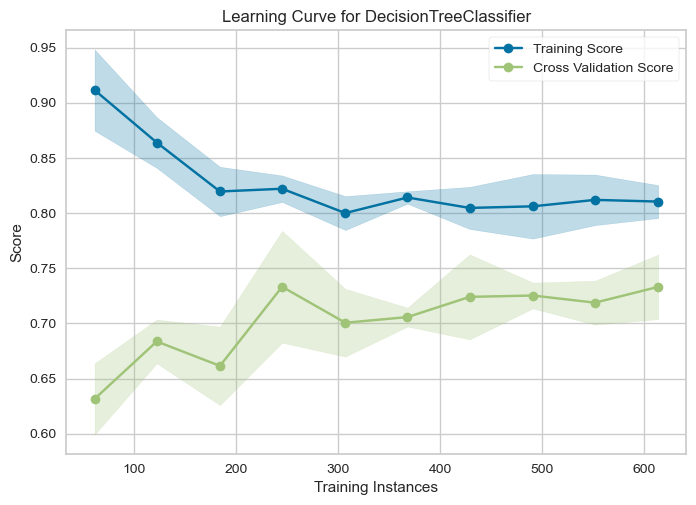

In [45]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=1), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

f1_score

In [46]:
print("Train f1_score = %.4f" % f1_score(y_train, y_train_pred))
print("Test f1_score = %.4f" % f1_score(y_test, y_pred))

Train f1_score = 1.0000
Test f1_score = 0.6379


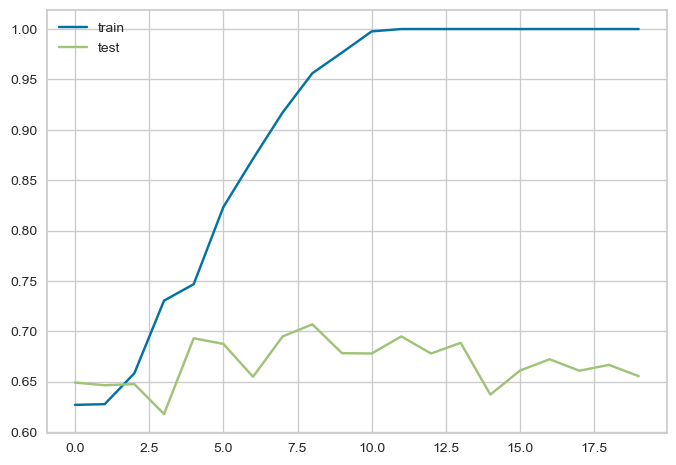

In [48]:
trains = []
tests = []
for i in np.linspace(1, 20, 20):
    model = DecisionTreeClassifier(max_depth=int(i)).fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    trains.append(f1_score(y_train, y_train_pred))
    tests.append(f1_score(y_test, y_pred))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

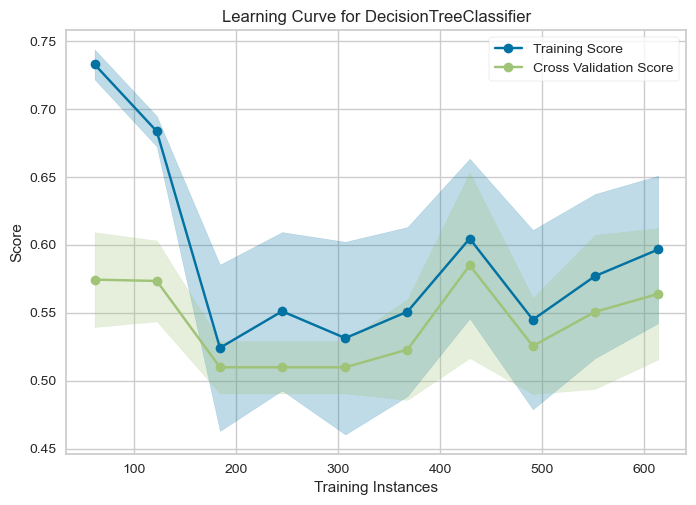

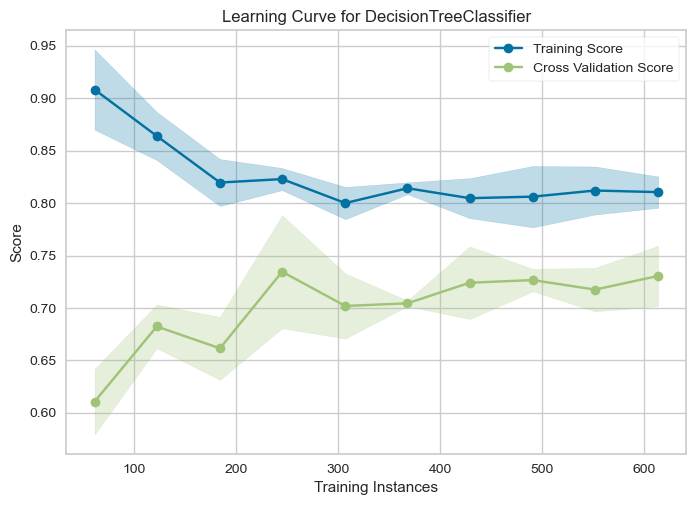

In [51]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=1),
    scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

#### 6. Повторите анализ на других реальных датасетах из репозитория OpenML:
    phoneme
    banknote-authentication
    delta_ailerons
    mammography
    electricity
    mozilla4
    kropt
    nursery
    volcanoes-b3

###### phoneme

In [57]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='phoneme', parser="auto")

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

In [36]:
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(5).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(5).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(5).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.8765
Test score = 0.8566


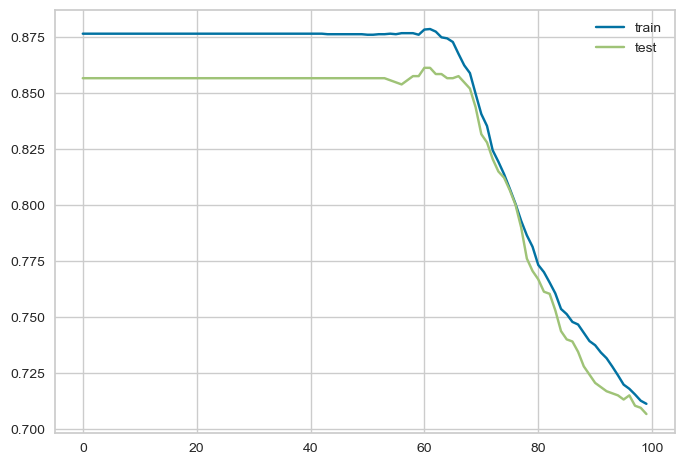

In [29]:
trains = []
tests = []
for k, i in enumerate(np.logspace(-8, 7, 100)):
    ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(5).fit_transform(X_train), y_train)
    trains.append(ridge.score(PolynomialFeatures(5).fit_transform(X_train), y_train))
    tests.append(ridge.score(PolynomialFeatures(5).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [30]:
model = RidgeClassifier(alpha=12.328).fit(PolynomialFeatures(5).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(5).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(5).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.8783
Test score = 0.8612


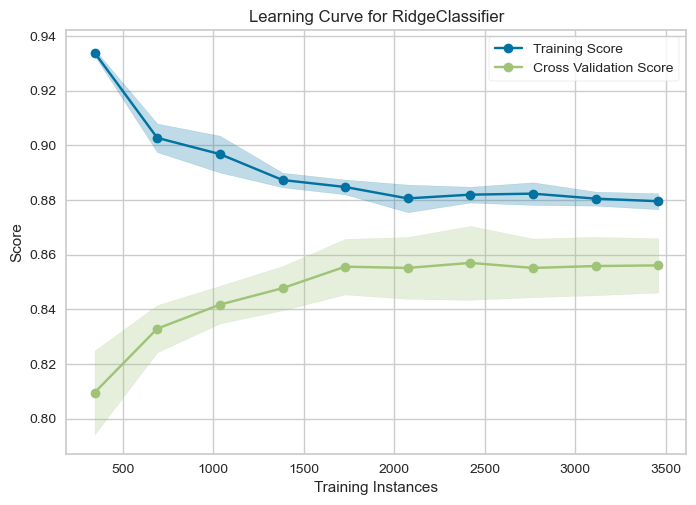

In [35]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=12.328), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(PolynomialFeatures(5).fit_transform(X_train), y_train).show() 

###### banknote-authentication

In [37]:
data = fetch_openml(name='banknote-authentication', parser="auto")

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9900
Test score = 0.9927


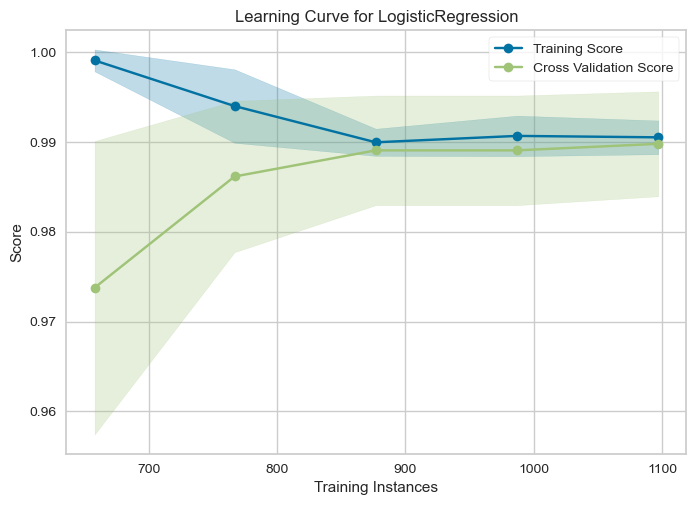

In [46]:
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X,y).show() 

###### delta_ailerons

In [89]:
data = fetch_openml(name='delta_ailerons', parser="auto")

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [90]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6058
Test score = 0.5940


In [91]:
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


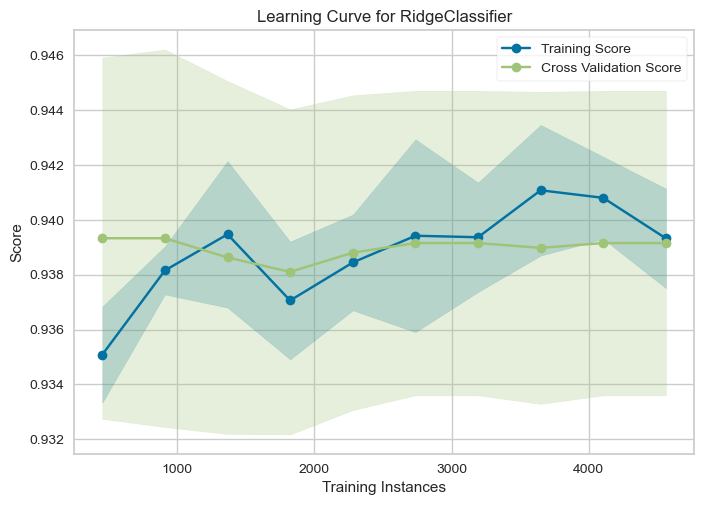

In [92]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=0.001), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(PolynomialFeatures(2).fit_transform(X_train), y_train).show() 

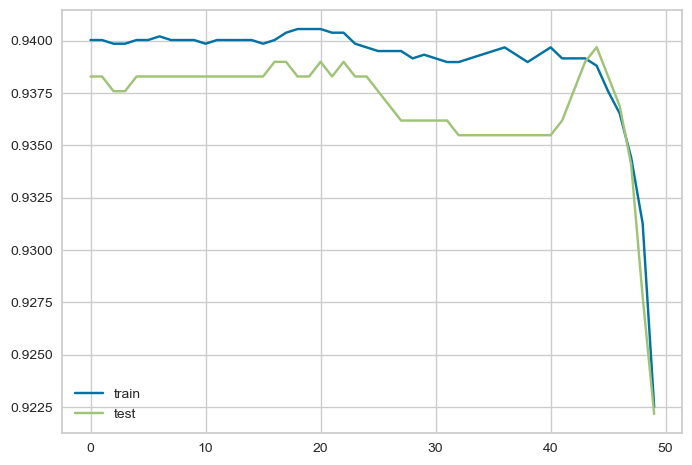

In [99]:
trains = []
tests = []
for k, i in enumerate(np.logspace(-7, 0, 50)):
#     print(k,i)
    ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
    trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
    tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

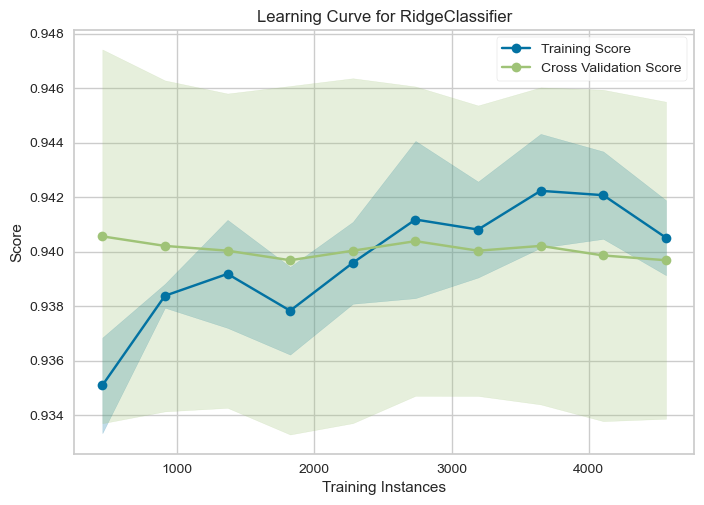

In [98]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=3.727593720314938e-05), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(PolynomialFeatures(2).fit_transform(X_train), y_train).show() 

###### mammography

In [6]:
data = fetch_openml(name='mammography', parser="auto")

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9839
Test score = 0.9826


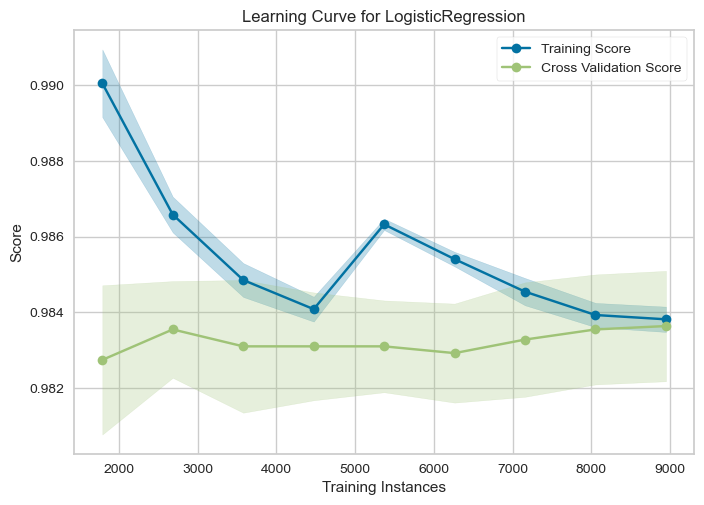

In [9]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X,y).show() 

###### electricity

In [63]:
from sklearn.preprocessing import LabelEncoder
data = fetch_openml(name='electricity', parser="auto")

X = data.data
y = data.target

labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(y)
y = labels.astype('float')

X['day'] = X['day'].astype('float')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-------------")
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")

-------------
Model: Logistic Regression
Accuracy: 0.7552686748317334
-------------
Model: Decision Tree
Accuracy: 0.8915370186472471
-------------
Model: K-Nearest Neighbors
Accuracy: 0.8040383978814962
-------------
Model: Naive Bayes
Accuracy: 0.7403729449409687
-------------
Model: Neural Network
Accuracy: 0.7935562175879951


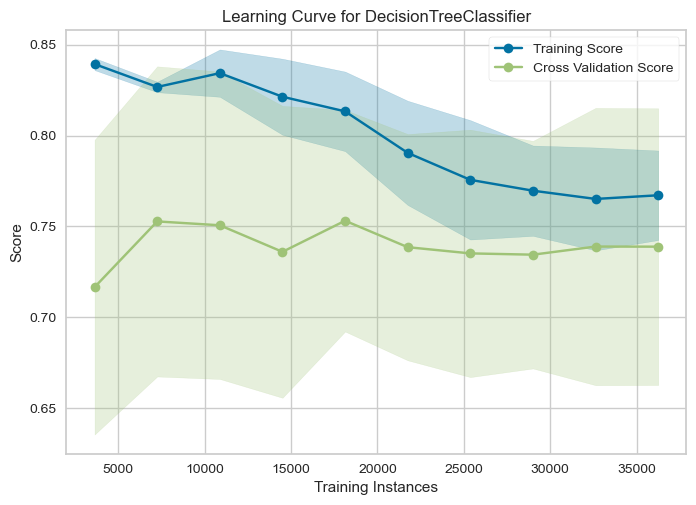

In [65]:
from yellowbrick.model_selection import LearningCurve
model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X,y).show() 

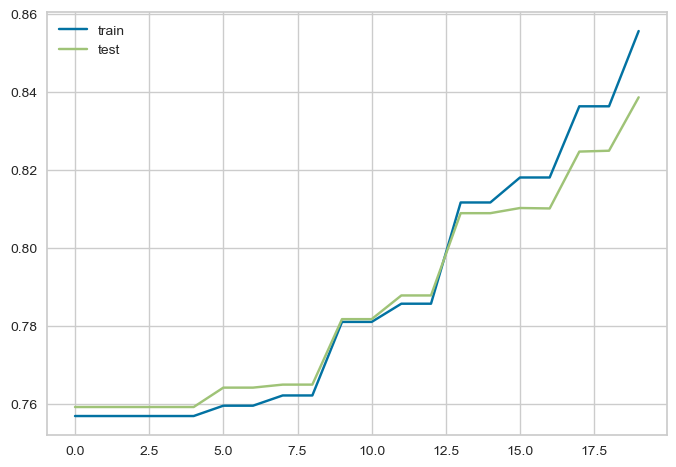

In [30]:
trains = []
tests = []
for i in np.linspace(1, 10, 20):
    dt_model = DecisionTreeClassifier(max_depth=int(i)).fit(X_train, y_train)
    trains.append(dt_model.score(X_train, y_train))
    tests.append(dt_model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

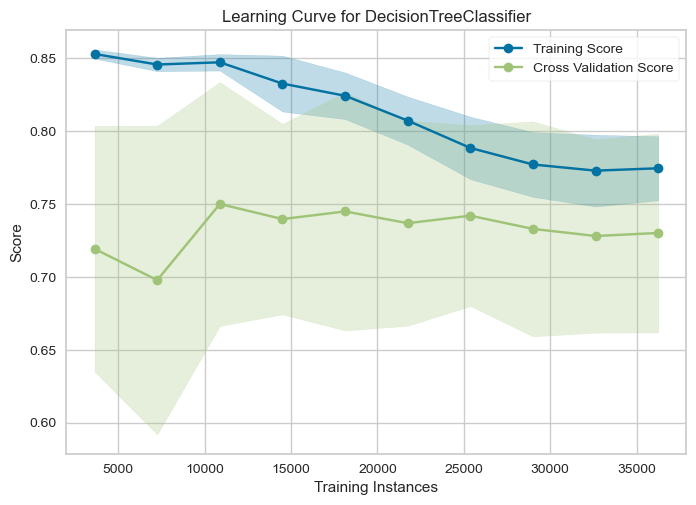

In [66]:
model = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X,y).show() 

###### mozilla4

In [58]:
from sklearn.preprocessing import LabelEncoder
data = fetch_openml(name='mozilla4', parser="auto")

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-------------")
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")

-------------
Model: Logistic Regression
Accuracy: 0.8578321003538115
-------------
Model: Decision Tree
Accuracy: 0.9330974589900289
-------------
Model: K-Nearest Neighbors
Accuracy: 0.9337407526535864
-------------
Model: Naive Bayes
Accuracy: 0.6744934062399486
-------------
Model: Neural Network
Accuracy: 0.9221614667095529


In [34]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(3).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(3).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(3).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.8696
Test score = 0.8736


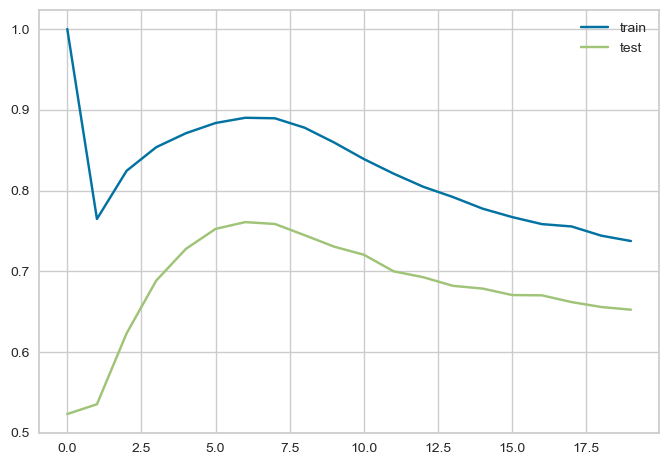

In [93]:
trains = []
tests = []
for i in np.linspace(1, 20, 20):
    knn_model_1 = KNeighborsClassifier(n_neighbors=int(i)).fit(X_train, y_train)
    trains.append(knn_model_1.score(X_train, y_train))
    tests.append(knn_model_1.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [61]:
knn_model = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)

print('n_neighbors = 6')
print(f"Training score: {knn_model.score(X_train, y_train):.4f}")
print(f"Test score: {knn_model.score(X_test, y_test):.4f}")

n_neighbors = 6
Training score: 0.9361
Test score: 0.9318


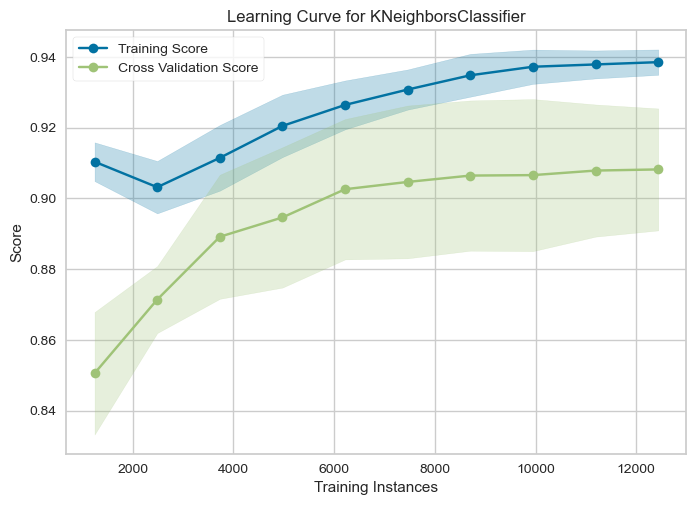

In [62]:
visualizer = LearningCurve(
    knn_model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

kropt

In [71]:
from sklearn.preprocessing import LabelEncoder
data = fetch_openml(name='kropt', parser="auto")

X = data.data
y = data.target

labelencoder = LabelEncoder()

for i in range(X.shape[1]):
    labels = labelencoder.fit_transform(X.iloc[:, i])
    X.iloc[:, i] = labels

labels_y = labelencoder.fit_transform(y)
y = labels_y.astype('float')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
X

white_king_col  white_king_row  white_rook_col  white_rook_row  \
0                   0               0               1               2   
1                   0               0               2               0   
2                   0               0               2               0   
3                   0               0               2               0   
4                   0               0               2               1   
...               ...             ...             ...             ...   
28051               1               0               6               6   
28052               1               0               6               6   
28053               1               0               6               6   
28054               1               0               6               6   
28055               1               0               6               6   

       black_king_col  black_king_row  
0                   2               1  
1                   2               1  
2                   3               0  
3                   3               1  
4                   2               0  
...               ...             ...  
28051               4               4  
28052               4               5  
28053               4               6  
28054               5               4  
28055               6               4  

[28056 rows x 6 columns]

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
#     "Neural Network": MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-------------")
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")

-------------
Model: Logistic Regression
Accuracy: 0.268888096935139
-------------
Model: Decision Tree
Accuracy: 0.8380256593014968
-------------
Model: K-Nearest Neighbors
Accuracy: 0.7277263007840342
-------------
Model: Naive Bayes
Accuracy: 0.2432287954383464


In [70]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(5).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(5).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(5).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.5395
Test score = 0.5127


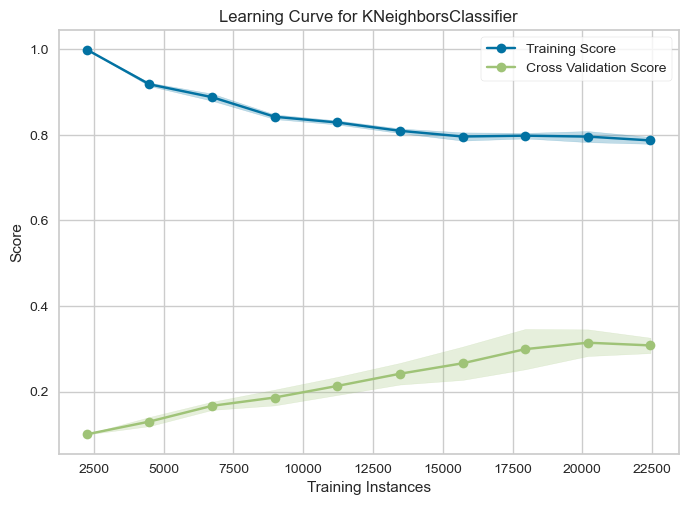

In [74]:
model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

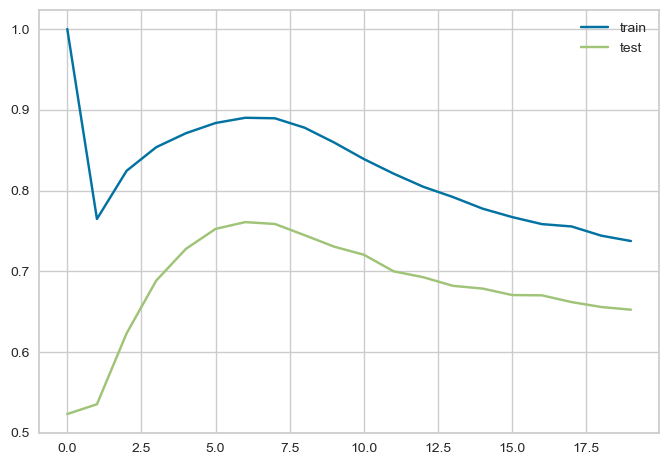

In [97]:
trains = []
tests = []
for i in np.linspace(1, 20, 20):
    knn_model_1 = KNeighborsClassifier(n_neighbors=int(i)).fit(X_train, y_train)
    trains.append(knn_model_1.score(X_train, y_train))
    tests.append(knn_model_1.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

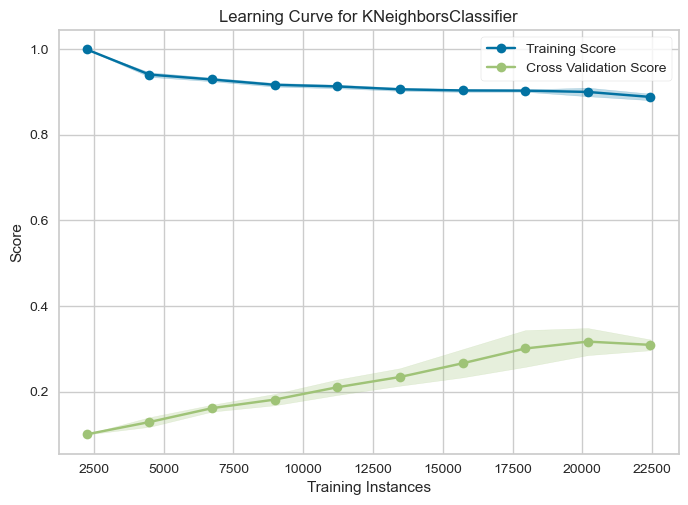

In [75]:
model = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

In [99]:
knn_model = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)

print('n_neighbors = 6')
print(f"Training score: {knn_model.score(X_train, y_train):.4f}")
print(f"Test score: {knn_model.score(X_test, y_test):.4f}")

n_neighbors = 6
Training score: 0.8836
Test score: 0.7525


nursery

In [76]:
from sklearn.preprocessing import LabelEncoder
data = fetch_openml(name='nursery', parser="auto")

X = data.data
y = data.target

labelencoder = LabelEncoder()

for i in range(X.shape[1]):
    labels = labelencoder.fit_transform(X.iloc[:, i])
    X.iloc[:, i] = labels

labels_y = labelencoder.fit_transform(y)
y = labels_y.astype('float')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-------------")
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")

-------------
Model: Logistic Regression
Accuracy: 0.7735339506172839
-------------
Model: Decision Tree
Accuracy: 0.9953703703703703
-------------
Model: K-Nearest Neighbors
Accuracy: 0.9402006172839507
-------------
Model: Naive Bayes
Accuracy: 0.6439043209876543
-------------
Model: Neural Network
Accuracy: 0.9857253086419753


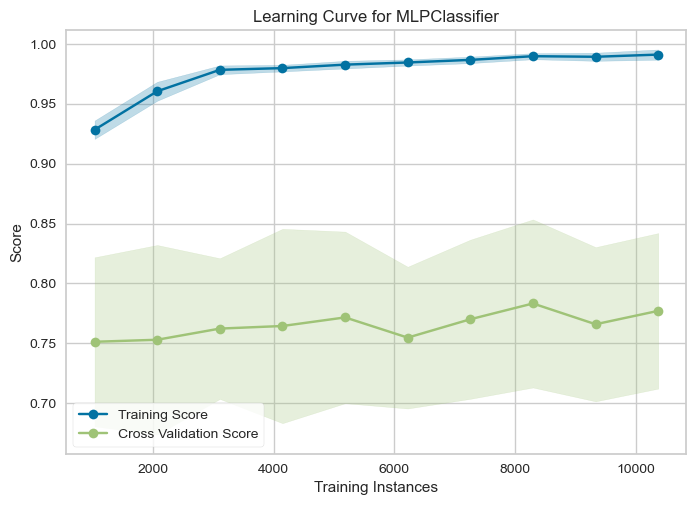

In [80]:
from yellowbrick.model_selection import LearningCurve
model = MLPClassifier().fit(X_train, y_train)
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X,y).show() 

In [81]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print(f"Training score: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test score: {accuracy_score(y_test, y_pred):.4f}")

Training score: 0.9872
Test score: 0.9846


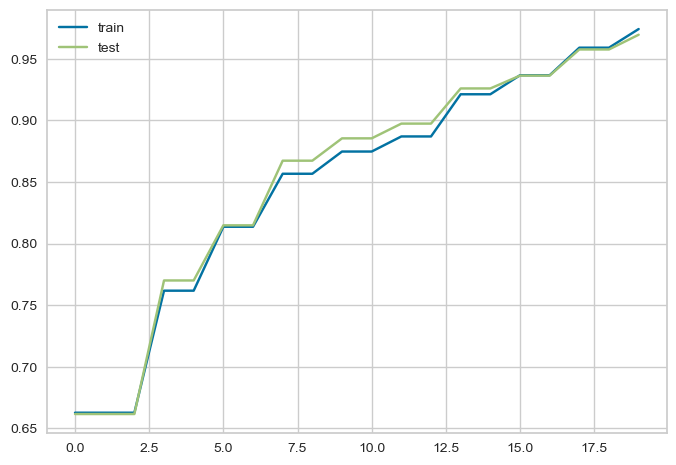

In [107]:
trains = []
tests = []
for i in np.linspace(1, 10, 20):
    dt_model = DecisionTreeClassifier(max_depth=int(i)).fit(X_train, y_train)
    trains.append(dt_model.score(X_train, y_train))
    tests.append(dt_model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

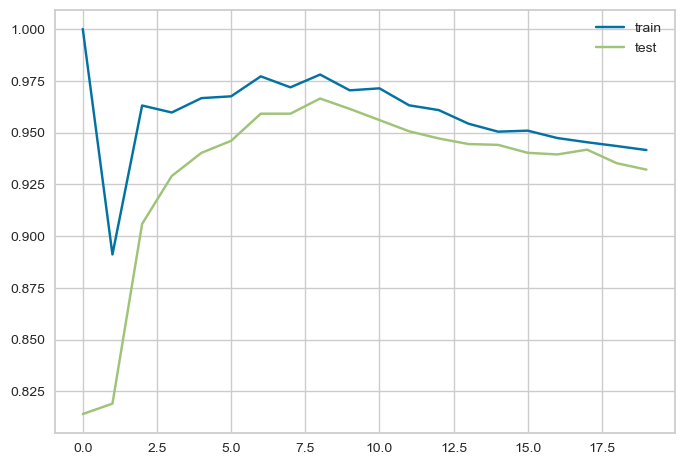

In [109]:
trains = []
tests = []
for i in np.linspace(1, 20, 20):
    knn_model_1 = KNeighborsClassifier(n_neighbors=int(i)).fit(X_train, y_train)
    trains.append(knn_model_1.score(X_train, y_train))
    tests.append(knn_model_1.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

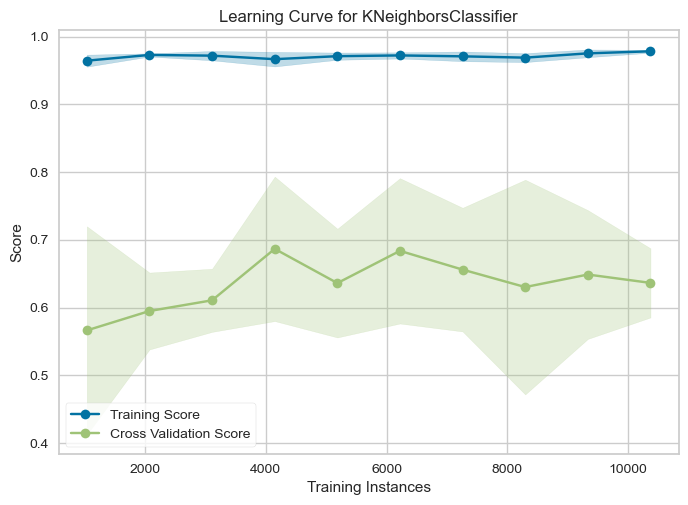

In [114]:
visualizer = LearningCurve(
    KNeighborsClassifier(n_neighbors=7),scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

volcanoes-b3

In [119]:
from sklearn.preprocessing import LabelEncoder
data = fetch_openml(name='volcanoes-b3', parser="auto")

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-------------")
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")

-------------
Model: Logistic Regression
Accuracy: 0.8578321003538115
-------------
Model: Decision Tree
Accuracy: 0.9343840463171438
-------------
Model: K-Nearest Neighbors
Accuracy: 0.9337407526535864
-------------
Model: Naive Bayes
Accuracy: 0.6744934062399486
-------------
Model: Neural Network
Accuracy: 0.9240913477002252


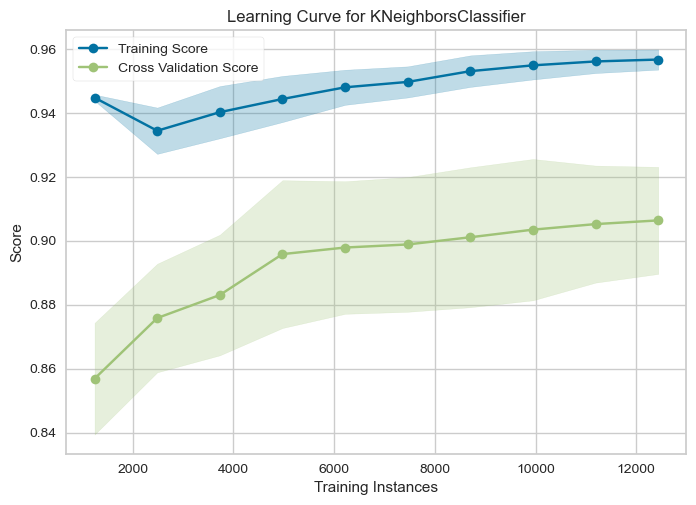

In [123]:
visualizer = LearningCurve(
    KNeighborsClassifier(n_neighbors=3), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

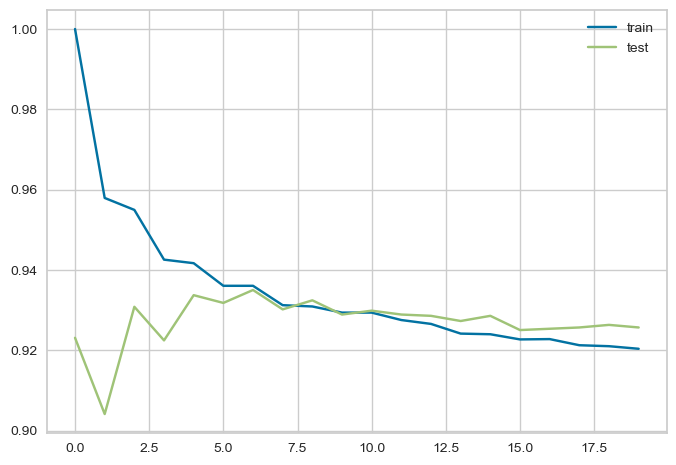

In [124]:
trains = []
tests = []
for i in np.linspace(1, 20, 20):
    knn_model_1 = KNeighborsClassifier(n_neighbors=int(i)).fit(X_train, y_train)
    trains.append(knn_model_1.score(X_train, y_train))
    tests.append(knn_model_1.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

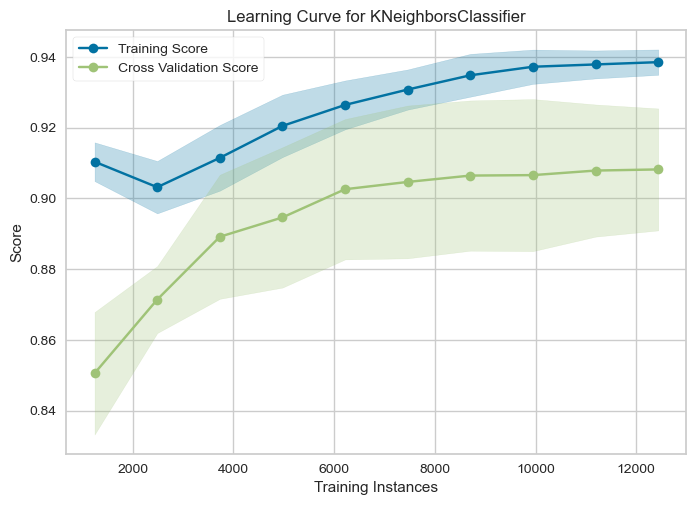

In [125]:
visualizer = LearningCurve(
    KNeighborsClassifier(n_neighbors=6), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

# Дополнительные задания

#### Повторите анализ последнего примера но с другими разделениями датасета на обучающую и тестовую выборки (изменяйте параметр random_state). Как меняется вид графиков?

In [126]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='delta_ailerons', parser="auto")
data.data.shape

(7129, 5)

In [128]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9393
Test score = 0.9376


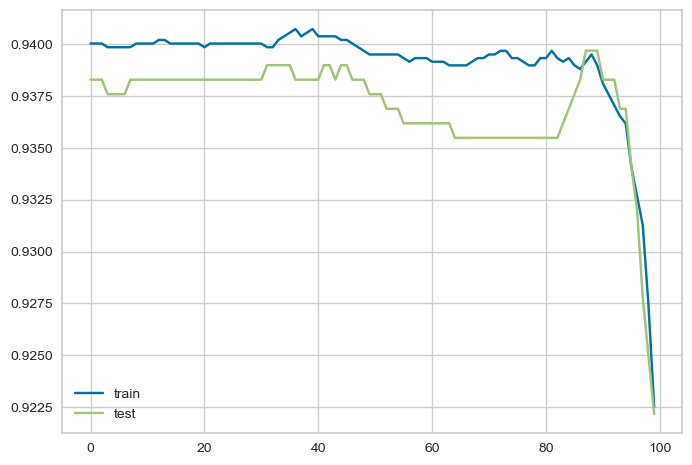

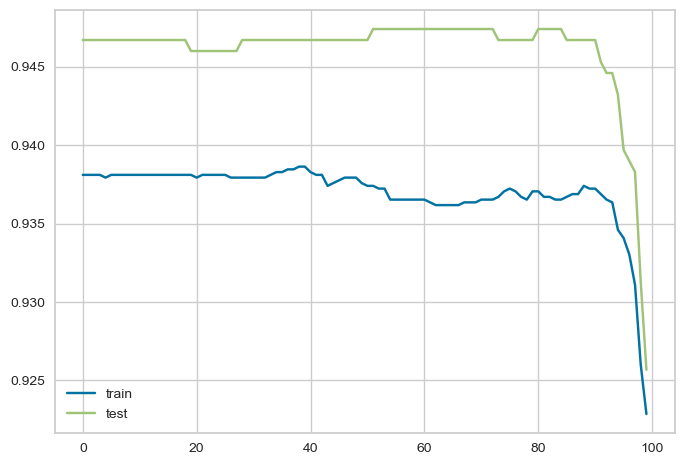

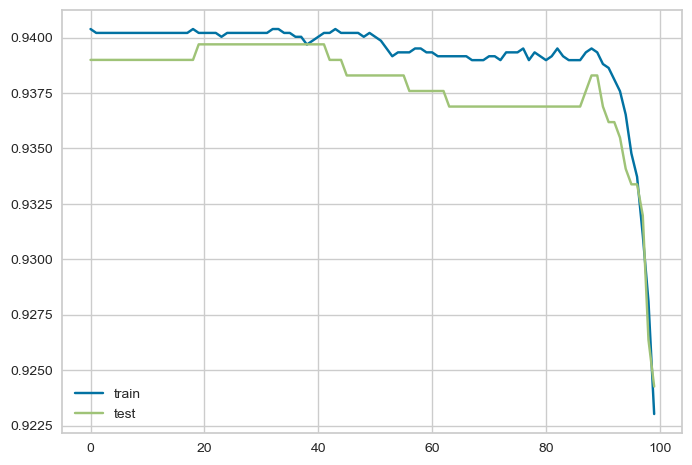

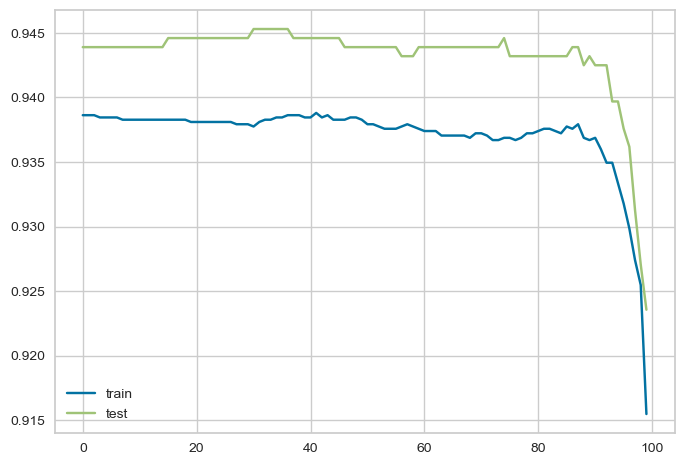

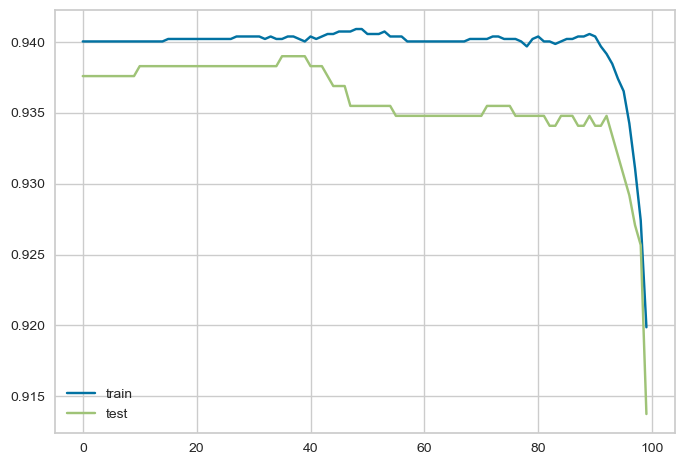

In [134]:
X = pd.get_dummies(data.data)
y = data.target
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    trains = []
    tests = []
    for i in np.logspace(-7, 0, 100):
        ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
        trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
        tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

    plt.plot(trains, label="train")
    plt.plot(tests, label="test")
    plt.legend()
    plt.show()